In [3]:
#pip install --upgrade tensorflow

In [221]:
from tensorflow.keras.models import load_model
model = load_model('/content/model_emnist.h5')
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1000)                │         785,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 800)                 │         800,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 600)                 │         480,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 400)                 │         240,400 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,306,800 (8.80 MB)

 Trainable params: 2,306,800 (8.80 MB)

 Non-trainable params: 0 (0.00 B)

In [222]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
X_finetune = np.load('/content/finetune_images_emnist.npy')
y_finetune = np.load('/content/finetune_labels_emnist.npy')
X_valid = np.load('/content/valid_images_emnist.npy')
y_valid = np.load('/content/valid_labels_emnist.npy')
X_test = np.load('/content/test_images_emnist.npy')
y_test = np.load('/content/test_labels_emnist.npy')
print(X_finetune.shape, y_finetune.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(9400, 28, 28) (9400,)
(9400, 28, 28) (9400,)
(18800, 28, 28) (18800,)


In [223]:
import sklearn
from sklearn.manifold import TSNE
print(f"""
LAYER 1: {sklearn.metrics.davies_bouldin_score(model(X_test.reshape((-1, 28*28)))[0], y_test)},
LAYER 2: {sklearn.metrics.davies_bouldin_score(model(X_test.reshape((-1, 28*28)))[1], y_test)},
LAYER 3: {sklearn.metrics.davies_bouldin_score(model(X_test.reshape((-1, 28*28)))[2], y_test)},
LAYER 4: {sklearn.metrics.davies_bouldin_score(model(X_test.reshape((-1, 28*28)))[3], y_test)}
      """)


LAYER 1: 5.102034352292413,
LAYER 2: 5.2583074249434665,
LAYER 3: 5.108343529782431,
LAYER 4: 5.184567397370619
      


In [224]:
from keras.models import Model
from keras.layers import Dense

num_classes = 47
softmax_layer = Dense(num_classes, activation='softmax', name='softmax_layer')(model.output[3])
final_model = Model(inputs=model.input, outputs=softmax_layer)
final_model.summary()

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1000)                │         785,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 800)                 │         800,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 600)                 │         480,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 400)                 │         240,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_layer (Dense)                │ (None, 47)                  │          18,847 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,325,647 (8.87 MB)

 Trainable params: 2,325,647 (8.87 MB)

 Non-trainable params: 0 (0.00 B)

In [225]:
final_model.layers[0].trainable = True
final_model.layers[1].trainable = True
final_model.layers[2].trainable = True
final_model.layers[3].trainable = True
final_model.layers[4].trainable = True
for layer in final_model.layers:
    print(f"Layer Name: {layer.name}, Trainable: {layer.trainable}")

Layer Name: input_layer_1, Trainable: True
Layer Name: dense_4, Trainable: True
Layer Name: dense_5, Trainable: True
Layer Name: dense_6, Trainable: True
Layer Name: dense_7, Trainable: True
Layer Name: softmax_layer, Trainable: True


In [226]:
initial_learning_rate = 0.0005
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=50,
    decay_rate=0.95,
    staircase=False)
final_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

In [227]:
selected_samples = X_finetune.reshape((-1, 28*28))
selected_labels = tf.keras.utils.to_categorical(y_finetune, num_classes=47)

In [228]:
images_valid = X_valid.reshape((-1, 28*28))
labels_valid = tf.keras.utils.to_categorical(y_valid, num_classes=47)

In [229]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)
history_finetune = final_model.fit(
    selected_samples[:1000],
    selected_labels[:1000],
    epochs=50,
    batch_size=256,
    validation_data=(images_valid, labels_valid),
    #callbacks=[early_stopping]
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 642ms/step - accuracy: 0.0294 - loss: 1141.8065 - val_accuracy: 0.0227 - val_loss: 1121.1240
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 441ms/step - accuracy: 0.0353 - loss: 1113.7747 - val_accuracy: 0.0282 - val_loss: 1090.6917
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 441ms/step - accuracy: 0.0573 - loss: 1084.6594 - val_accuracy: 0.1081 - val_loss: 1063.5929
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 438ms/step - accuracy: 0.1444 - loss: 1057.5657 - val_accuracy: 0.1156 - val_loss: 1037.3496
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 447ms/step - accuracy: 0.1748 - loss: 1031.5449 - val_accuracy: 0.1984 - val_loss: 1012.3824
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2835 - loss: 1006.7131 - val_accuracy: 0.2578 - val_loss: 988.3134
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 434ms/step - accuracy: 0.3821 - loss: 982.7495 - val_accuracy: 0.3409 - val_loss: 965.2009
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 451ms/step - accuracy: 0.4766 - loss: 959.7

In [230]:
y_test_selected = tf.keras.utils.to_categorical(y_test, num_classes=47)
print(final_model.evaluate(X_test.reshape((-1, 28*28)), y_test_selected))

588/588 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.5461 - loss: 432.7638
[432.74273681640625, 0.5498404502868652]


In [231]:
val_acc_finetune = history_finetune.history['val_accuracy']

number of epochs:50


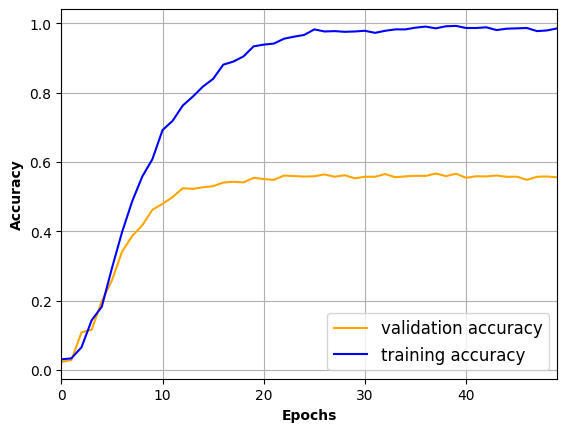

In [232]:
epochs = int(input('number of epochs:'))
plt.plot(np.arange(0,epochs), history_finetune.history['val_accuracy'], color = 'orange', label = 'validation accuracy')
plt.plot(np.arange(0,epochs), history_finetune.history['accuracy'], color = 'blue', label = 'training accuracy')
plt.xlim(0, epochs - 1)
#plt.ylim(0, 0.6)
plt.xlabel('Epochs', fontweight = 'bold')
plt.ylabel('Accuracy', fontweight = 'bold')
plt.grid()
plt.legend(loc='lower right', fontsize=12)

number of epochs:50


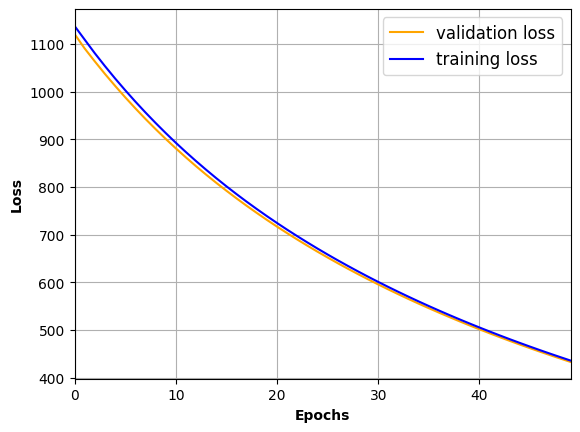

In [233]:
epochs = int(input('number of epochs:'))
plt.plot(np.arange(0,epochs), history_finetune.history['val_loss'], color = 'orange', label = 'validation loss')
plt.plot(np.arange(0,epochs), history_finetune.history['loss'], color = 'blue', label = 'training loss')
plt.xlim(0, epochs - 1)
#plt.ylim(0, 0.6)
plt.xlabel('Epochs', fontweight = 'bold')
plt.ylabel('Loss', fontweight = 'bold')
plt.grid()
plt.legend(loc='upper right', fontsize=12)

588/588 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step


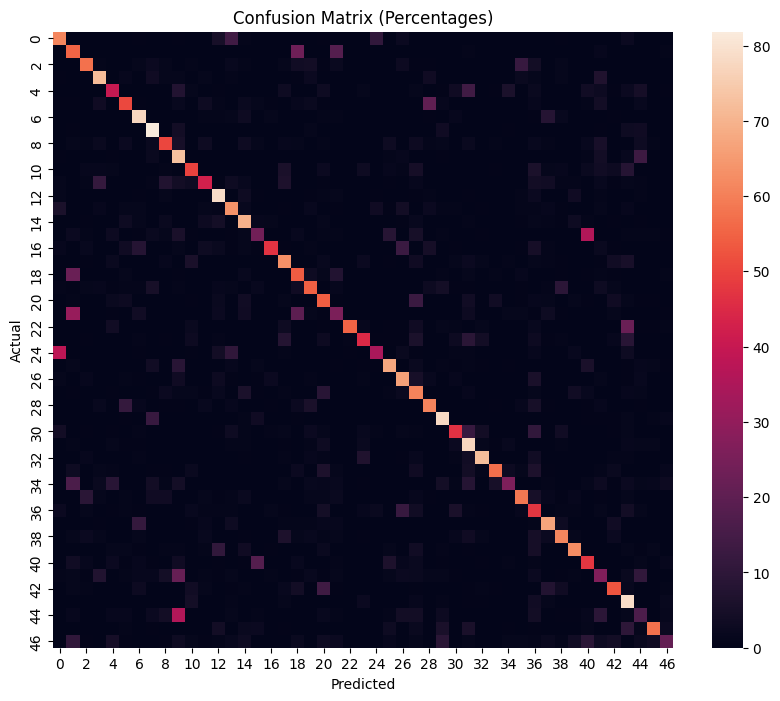

In [234]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

logits = final_model.predict(X_test.reshape((-1, 28*28)))
predicted_labels = np.argmax(logits, axis=-1)

cf_matrix = confusion_matrix(y_test, predicted_labels)

cf_matrix_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

cf_matrix_percent = cf_matrix_normalized * 100

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix_percent, annot=False, fmt=".2f")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Percentages)')
plt.show()

In [235]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report

y_pred = final_model.predict(X_test.reshape((-1, 28*28)))
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

588/588 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
              precision    recall  f1-score   support

           0       0.50      0.61      0.55       396
           1       0.37      0.55      0.44       427
           2       0.66      0.57      0.62       407
           3       0.65      0.72      0.68       402
           4       0.53      0.40      0.46       400
           5       0.55      0.51      0.53       374
           6       0.62      0.77      0.69       367
           7       0.62      0.82      0.70       380
           8       0.59      0.50      0.55       408
           9       0.38      0.73      0.50       372
          10       0.58      0.50      0.53       377
          11       0.62      0.43      0.51       410
          12       0.61      0.79      0.69       397
          13       0.55      0.64      0.59       401
          14       0.58      0.70      0.63       402
          15       0.42      0.24      0.30       420
          16       0.83      0.47      0

## Baseline

In [241]:
def create_model():
    inputs = keras.layers.Input(shape=(28*28,))
    layer1 = keras.layers.Dense(1000, activation='selu',
                                kernel_initializer = 'glorot_uniform' , kernel_regularizer = tf.keras.regularizers.L2(0.1))(inputs)
    layer2 = keras.layers.Dense(800, activation='selu',
                                kernel_initializer = 'glorot_uniform', kernel_regularizer = tf.keras.regularizers.L2(0.1))(layer1)
    layer3 = keras.layers.Dense(600, activation='selu',
                                kernel_initializer = 'glorot_uniform', kernel_regularizer = tf.keras.regularizers.L2(0.1))(layer2)
    layer4 = keras.layers.Dense(400, activation='selu',
                                kernel_initializer = 'glorot_uniform', kernel_regularizer = tf.keras.regularizers.L2(0.1))(layer3)
    model = keras.models.Model(inputs=inputs, outputs=[layer1, layer2, layer3, layer4])
    return model
model_ = create_model()
num_classes = 47
softmax_layer = Dense(num_classes, activation='softmax', name='softmax_layer')(model_.output[3])
final_model = Model(inputs=model_.input, outputs=softmax_layer)
final_model.summary()

Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1000)                │         785,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 800)                 │         800,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 600)                 │         480,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 400)                 │         240,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_layer (Dense)                │ (None, 47)                  │          18,847 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,325,647 (8.87 MB)

 Trainable params: 2,325,647 (8.87 MB)

 Non-trainable params: 0 (0.00 B)

In [242]:
initial_learning_rate = 0.0005
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=50,
    decay_rate=0.95,
    staircase=False)
final_model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

In [243]:
selected_samples = X_finetune.reshape((-1, 28*28))
selected_labels = tf.keras.utils.to_categorical(y_finetune, num_classes=47)

In [244]:
images_valid = X_valid.reshape((-1, 28*28))
labels_valid = tf.keras.utils.to_categorical(y_valid, num_classes=47)

In [245]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)
history_finetune = final_model.fit(
    selected_samples[:1000],
    selected_labels[:1000],
    epochs=50,
    batch_size=256,
    validation_data=(images_valid, labels_valid),
    #callbacks=[early_stopping]
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.0276 - loss: 385.7236 - val_accuracy: 0.0511 - val_loss: 348.3756
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 982ms/step - accuracy: 0.1053 - loss: 331.5359 - val_accuracy: 0.1338 - val_loss: 313.3904
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 449ms/step - accuracy: 0.2084 - loss: 302.7753 - val_accuracy: 0.1882 - val_loss: 294.5601
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 446ms/step - accuracy: 0.3454 - loss: 286.3262 - val_accuracy: 0.2434 - val_loss: 283.2460
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 459ms/step - accuracy: 0.4817 - loss: 275.8458 - val_accuracy: 0.2707 - val_loss: 274.5279
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 465ms/step - accuracy: 0.5967 - loss: 267.2921 - val_accuracy: 0.2957 - val_loss: 266.6866
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 968ms/step - accuracy: 0.7303 - loss: 259.3901 - val_accuracy: 0.3102 - val_loss: 259.9609
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 449ms/step - accuracy: 0.8169 - loss: 252.8108 - val_a

In [247]:
y_test_selected = tf.keras.utils.to_categorical(y_test, num_classes=47)
print(final_model.evaluate(X_test.reshape((-1, 28*28)), y_test_selected))

588/588 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.3914 - loss: 114.0027
[113.98816680908203, 0.3920212686061859]


In [248]:
val_acc_baseline = history_finetune.history['val_accuracy']

number of epochs:50


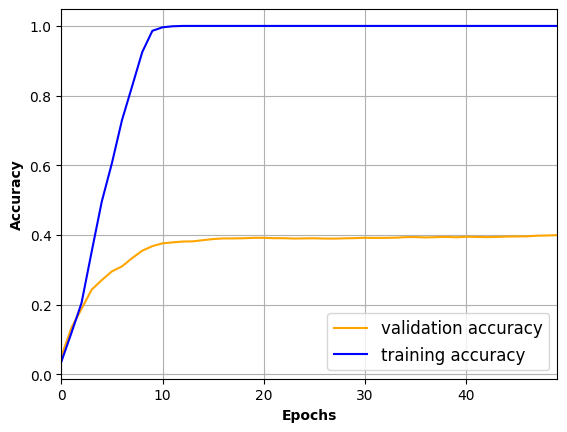

In [249]:
epochs = int(input('number of epochs:'))
plt.plot(np.arange(0,epochs), history_finetune.history['val_accuracy'], color = 'orange', label = 'validation accuracy')
plt.plot(np.arange(0,epochs), history_finetune.history['accuracy'], color = 'blue', label = 'training accuracy')
plt.xlim(0, epochs - 1)
#plt.ylim(0, 0.6)
plt.xlabel('Epochs', fontweight = 'bold')
plt.ylabel('Accuracy', fontweight = 'bold')
plt.grid()
plt.legend(loc='lower right', fontsize=12)

number of epochs:50


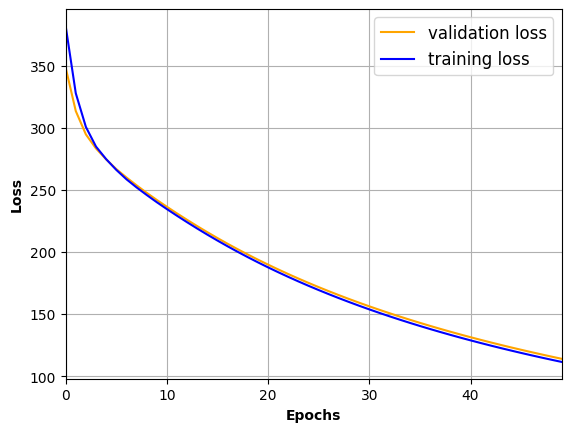

In [250]:
epochs = int(input('number of epochs:'))
plt.plot(np.arange(0,epochs), history_finetune.history['val_loss'], color = 'orange', label = 'validation loss')
plt.plot(np.arange(0,epochs), history_finetune.history['loss'], color = 'blue', label = 'training loss')
plt.xlim(0, epochs - 1)
#plt.ylim(0, 0.6)
plt.xlabel('Epochs', fontweight = 'bold')
plt.ylabel('Loss', fontweight = 'bold')
plt.grid()
plt.legend(loc='upper right', fontsize=12)

588/588 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step


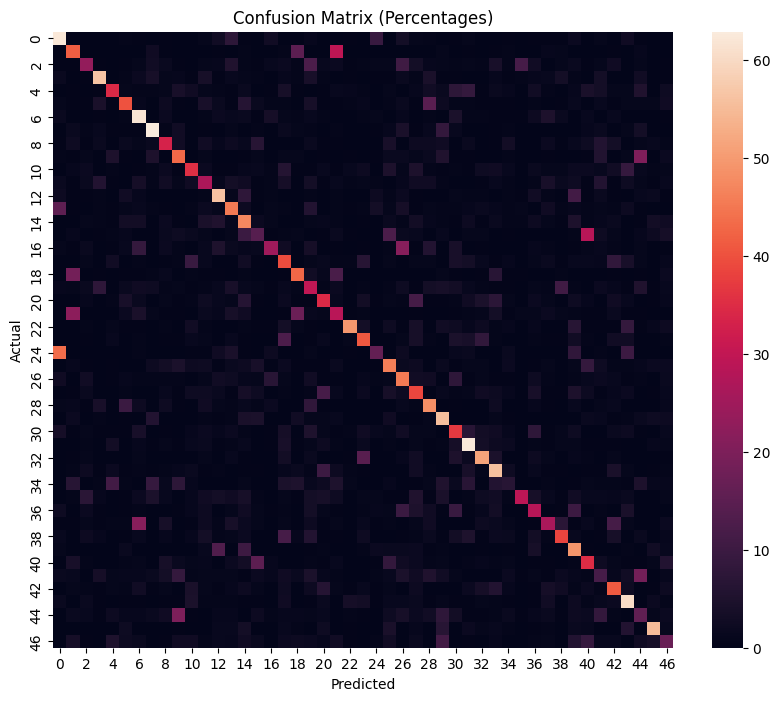

In [251]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

logits = final_model.predict(X_test.reshape((-1, 28*28)))
predicted_labels = np.argmax(logits, axis=-1)

cf_matrix = confusion_matrix(y_test, predicted_labels)

cf_matrix_normalized = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

cf_matrix_percent = cf_matrix_normalized * 100

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix_percent, annot=False, fmt=".2f")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Percentages)')
plt.show()

In [252]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report

y_pred = final_model.predict(X_test.reshape((-1, 28*28)))
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

588/588 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
              precision    recall  f1-score   support

           0       0.41      0.62      0.50       396
           1       0.37      0.42      0.39       427
           2       0.38      0.23      0.29       407
           3       0.60      0.56      0.58       402
           4       0.46      0.34      0.40       400
           5       0.44      0.40      0.42       374
           6       0.42      0.62      0.50       367
           7       0.55      0.63      0.59       380
           8       0.40      0.33      0.37       408
           9       0.38      0.43      0.40       372
          10       0.40      0.36      0.38       377
          11       0.31      0.27      0.29       410
          12       0.48      0.56      0.52       397
          13       0.40      0.45      0.43       401
          14       0.32      0.47      0.38       402
          15       0.21      0.14      0.17       420
          16       0.49      0.25      0

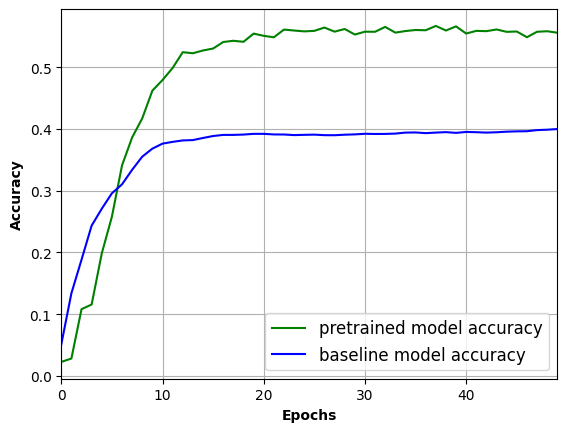

In [253]:
plt.plot(np.arange(0,50), val_acc_finetune, color = 'green', label = 'pretrained model accuracy')
plt.plot(np.arange(0,50), val_acc_baseline, color = 'blue', label = 'baseline model accuracy')
plt.xlim(0, 50 - 1)
#plt.ylim(0, 0.6)
plt.xlabel('Epochs', fontweight = 'bold')
plt.ylabel('Accuracy', fontweight = 'bold')
plt.grid()
plt.legend(loc='lower right', fontsize=12)